In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df_install = pd.read_csv(r"C:\Users\swift\Downloads\input\inputs\installments_payments.csv")
df_train = pd.read_csv(r"C:\Users\swift\Downloads\input\inputs\application_train.csv")

In [3]:
df_install

,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,SK_ID_CURR
0,1054186,1.0,6,-1180.0,-1187.0,6948.360,6948.360,147397.0
1,2452854,1.0,21,-546.0,-552.0,11302.605,11302.605,147397.0
2,1054186,1.0,2,-1300.0,-1307.0,6948.360,6948.360,147397.0
3,1682318,1.0,2,-240.0,-243.0,7374.510,7374.510,147397.0
4,2452854,1.0,10,-876.0,-882.0,11302.605,11302.605,147397.0
...,...,...,...,...,...,...,...,...
7744753,2192667,1.0,6,-2352.0,-2352.0,5322.240,5322.240,21216.0
7744754,2208281,1.0,4,-452.0,-466.0,63195.435,63195.435,21216.0
7744755,2657771,0.0,3,-2907.0,-2932.0,3375.000,3375.000,21216.0
7744756,2657771,0.0,47,-1871.0,-1871.0,4915.890,4915.890,21216.0


In [4]:
df_install['NEW_DAYS_PAID_EARLIER'] = df_install['DAYS_INSTALMENT']-df_install['DAYS_ENTRY_PAYMENT']

    # Whether each installment payment is late or not is 1: paid late, 0: represents early payment.
df_install['NEW_NUM_PAID_LATER'] = df_install['NEW_DAYS_PAID_EARLIER'].map(lambda x: 1 if x<0 else 0)

In [5]:
df_install[df_install["SK_ID_CURR"] == 100001].sort_values(by= "DAYS_INSTALMENT")

,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,SK_ID_CURR,NEW_DAYS_PAID_EARLIER,NEW_NUM_PAID_LATER
1878870,2001580,1.0,1,-2064.0,-2087.0,6606.450,6606.450,100001.0,23.0,0
1878863,2001580,1.0,2,-2034.0,-2053.0,6606.450,6606.450,100001.0,19.0,0
1878862,2001580,1.0,3,-2004.0,-2025.0,6606.450,6606.450,100001.0,21.0,0
1878856,2001580,1.0,4,-1974.0,-1993.0,6606.450,6606.450,100001.0,19.0,0
1878858,2001580,1.0,5,-1944.0,-1968.0,6606.450,6606.450,100001.0,24.0,0
1878865,2001580,1.0,6,-1914.0,-1943.0,6606.450,6606.450,100001.0,29.0,0
1878866,2001580,1.0,7,-1884.0,-1906.0,6606.450,6606.450,100001.0,22.0,0
1878868,2001580,1.0,8,-1854.0,-1873.0,6606.450,6606.450,100001.0,19.0,0
1878869,2001580,1.0,9,-1824.0,-1843.0,6606.450,6606.450,100001.0,19.0,0
1878867,2001580,1.0,10,-1794.0,-1815.0,6577.605,6577.605,100001.0,21.0,0


In [6]:
df_install[df_install["SK_ID_CURR"] == 100001].sort_values(by= "DAYS_INSTALMENT").groupby(["SK_ID_PREV"]).last()

,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,SK_ID_CURR,NEW_DAYS_PAID_EARLIER,NEW_NUM_PAID_LATER
SK_ID_PREV,,,,,,,,,
1037503,1.0,6,-768.0,-789.0,25821.000,25821.000,100001.0,21.0,0
2001580,1.0,10,-1794.0,-1815.0,6577.605,6577.605,100001.0,21.0,0


In [7]:
df_install.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7744758 entries, 0 to 7744757
Data columns (total 10 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   NUM_INSTALMENT_VERSION  float64
 2   NUM_INSTALMENT_NUMBER   int64  
 3   DAYS_INSTALMENT         float64
 4   DAYS_ENTRY_PAYMENT      float64
 5   AMT_INSTALMENT          float64
 6   AMT_PAYMENT             float64
 7   SK_ID_CURR              float64
 8   NEW_DAYS_PAID_EARLIER   float64
 9   NEW_NUM_PAID_LATER      int64  
dtypes: float64(7), int64(3)
memory usage: 590.9 MB


SK_ID_PREV: ID of previous credit in Home Credit related to loan in our sample         
SK_ID_CURR: ID of loan in our sample           
NUM_INSTALMENT_VERSION: Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed

NUM_INSTALMENT_NUMBER : On which installment we observe payment (lan tra gop so bao nhieu)

DAYS_INSTALMENT: When the installment of previous credit was supposed to be paid (relative to application date of current loan),time only relative to the application (ngay tra gop)       
DAYS_ENTRY_PAYMENT: When was the installments of previous credit paid actually (ngay ma khach hang that su tra)    
AMT_INSTALMENT: What was the prescribed installment amount of previous credit on this installment (luong tien tra gop dang ra khach hang phai tra)     
AMT_PAYMENT: What the client actually paid on previous credit on this installment ( luong tien tra gop ma khach hang that su tra)

In [8]:
df_install.duplicated().sum()

0

In [9]:
df_install.isnull().sum()

SK_ID_PREV                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        1639
AMT_INSTALMENT               1
AMT_PAYMENT               1639
SK_ID_CURR                   1
NEW_DAYS_PAID_EARLIER     1639
NEW_NUM_PAID_LATER           0
dtype: int64

In [10]:
(df_install.isna().sum() / df_install.shape[0]).sort_values(ascending=False)

DAYS_ENTRY_PAYMENT        2.116270e-04
AMT_PAYMENT               2.116270e-04
NEW_DAYS_PAID_EARLIER     2.116270e-04
AMT_INSTALMENT            1.291196e-07
SK_ID_CURR                1.291196e-07
SK_ID_PREV                0.000000e+00
NUM_INSTALMENT_VERSION    0.000000e+00
NUM_INSTALMENT_NUMBER     0.000000e+00
DAYS_INSTALMENT           0.000000e+00
NEW_NUM_PAID_LATER        0.000000e+00
dtype: float64

In [11]:
def check_missed_values(df):
    df_null_percentage = df.isnull().sum() / df.shape[0] * 100
    df_null_percentage = df_null_percentage.drop(df_null_percentage[df_null_percentage == 0].index).sort_values(ascending= False).reset_index()
    df_null_percentage.columns = ["Feature", "Percentage"]
    return df_null_percentage

null_df = check_missed_values(df_install)

<Axes: xlabel='Percentage', ylabel='Feature'>

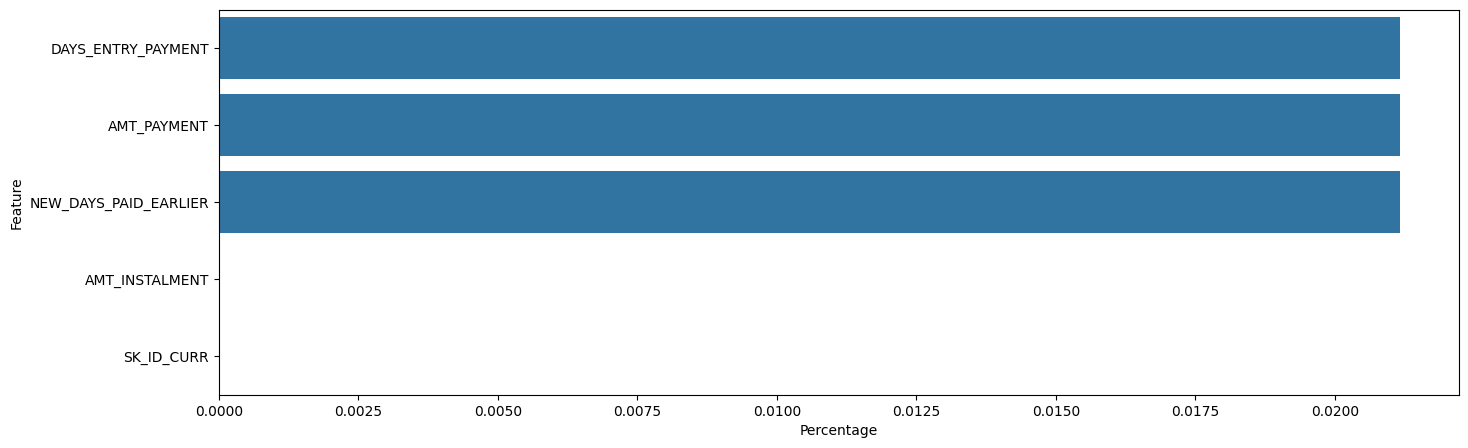

In [12]:
plt.figure(figsize=(16,5))
sns.barplot(x=  null_df["Percentage"] , y= null_df["Feature"] )

You can see in the chart is that the percentage of missing values for feature AMT_payment and Days_entry_payment is really low, we can drop them and make no impact to the result

After droped there is no missed value left

<Axes: >

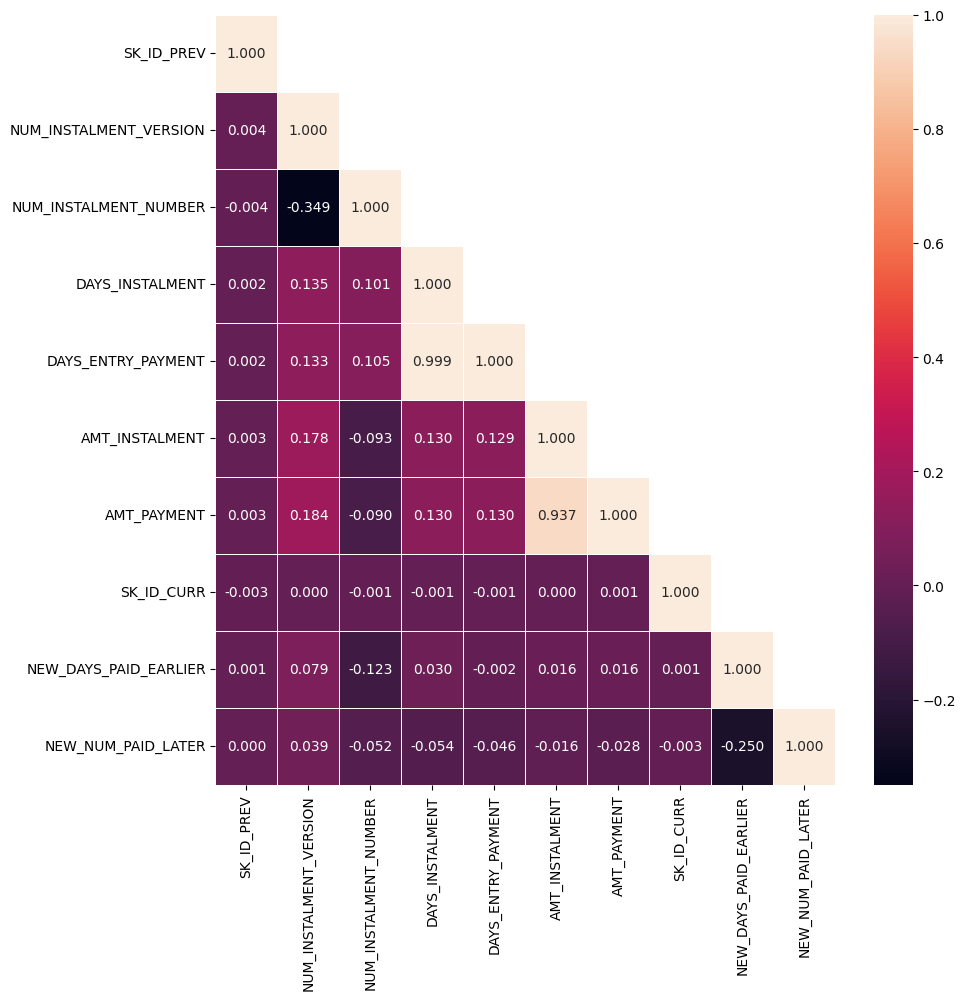

In [13]:
numeric_df = df_install._get_numeric_data()
numeric_df_corr = numeric_df.corr()
numeric_df_corr

plt.figure(figsize=(10,10))
mask = np.zeros_like(numeric_df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False
sns.heatmap(numeric_df_corr,mask= mask, annot= True, fmt=".3f", linewidth=.5)

In [14]:
df_install_df = df_install.drop(["SK_ID_PREV"], axis = 1)
df_install_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7744758 entries, 0 to 7744757
Data columns (total 9 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NUM_INSTALMENT_VERSION  float64
 1   NUM_INSTALMENT_NUMBER   int64  
 2   DAYS_INSTALMENT         float64
 3   DAYS_ENTRY_PAYMENT      float64
 4   AMT_INSTALMENT          float64
 5   AMT_PAYMENT             float64
 6   SK_ID_CURR              float64
 7   NEW_DAYS_PAID_EARLIER   float64
 8   NEW_NUM_PAID_LATER      int64  
dtypes: float64(7), int64(2)
memory usage: 531.8 MB


In [15]:
df_install_merged = pd.merge(df_train[['SK_ID_CURR','TARGET']], df_install, how = 'left', on=['SK_ID_CURR'])
df_install_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,NEW_DAYS_PAID_EARLIER,NEW_NUM_PAID_LATER
0,278621,0,1810518.0,1.0,2.0,-686.0,-690.0,98356.995,98356.995,4.0,0.0
1,278621,0,1810518.0,1.0,3.0,-656.0,-661.0,98356.995,98356.995,5.0,0.0
2,278621,0,2396755.0,1.0,4.0,-2220.0,-2226.0,6737.310,6737.310,6.0,0.0
3,278621,0,2396755.0,1.0,9.0,-2070.0,-2071.0,6737.310,6737.310,1.0,0.0
4,278621,0,2396755.0,1.0,5.0,-2190.0,-2199.0,6737.310,6737.310,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6292342,90253,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6292343,9027,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6292344,163598,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6292345,300375,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: ylabel='NUM_INSTALMENT_VERSION'>

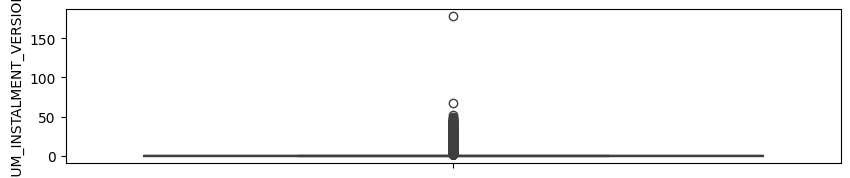

In [16]:
plt.figure(figsize=(10,2))
sns.boxplot(df_install_merged["NUM_INSTALMENT_VERSION"])

<Axes: ylabel='NUM_INSTALMENT_NUMBER'>

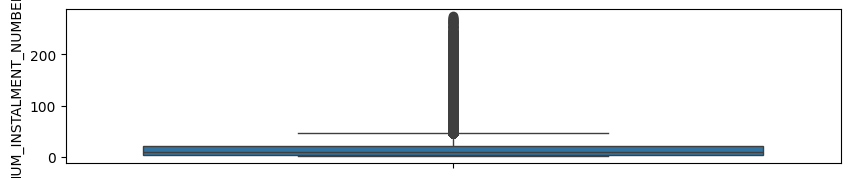

In [17]:
plt.figure(figsize=(10,2))
sns.boxplot(df_install_merged["NUM_INSTALMENT_NUMBER"])

<Axes: ylabel='AMT_INSTALMENT'>

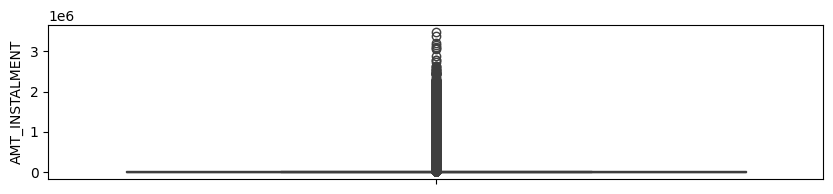

In [18]:
plt.figure(figsize=(10,2))
sns.boxplot(df_install_merged["AMT_INSTALMENT"])

<Axes: ylabel='AMT_PAYMENT'>

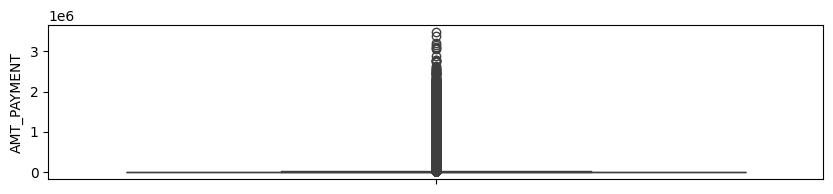

In [19]:
plt.figure(figsize=(10,2))
sns.boxplot(df_install_merged["AMT_PAYMENT"])

# Biến Categorical

Plotting 8 columns: ['SK_ID_PREV', 'NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT', 'NEW_DAYS_PAID_EARLIER']


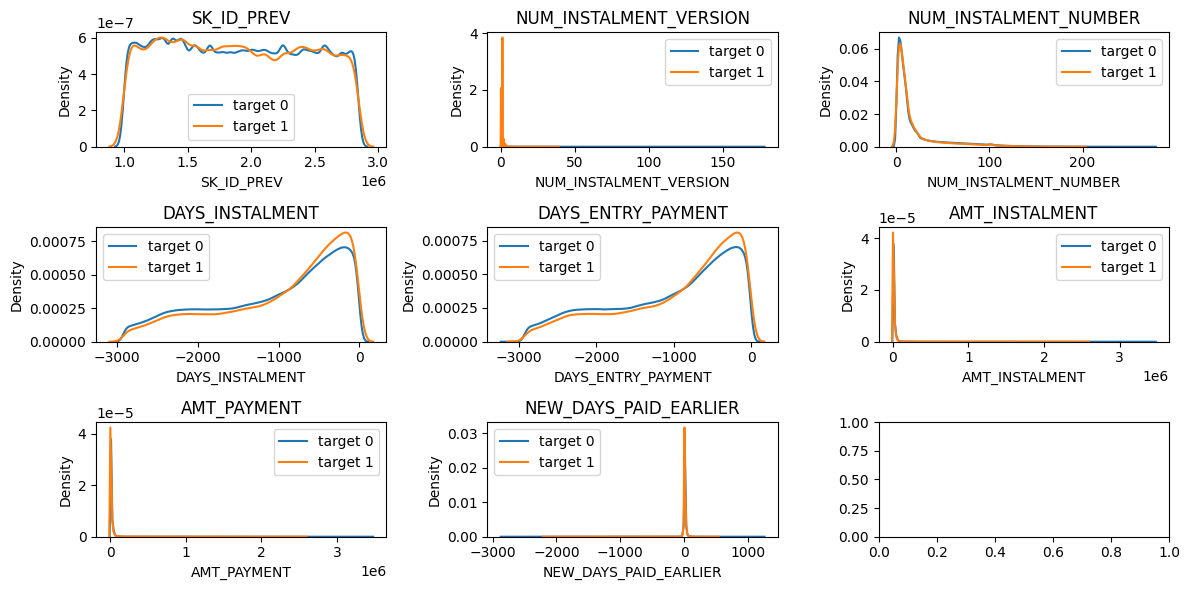

In [20]:
# Plot the distribution of the numerical features with hue = target
cols_to_plot = df_install_merged[:].var()[df_install_merged[:].var() > 0.1].index.tolist()
cols_to_plot.remove('SK_ID_CURR')
print(f'Plotting {len(cols_to_plot)} columns: {cols_to_plot}')
ncol, nrow = 3, len(cols_to_plot)//3 + 1
fig, ax = plt.subplots(nrow, ncol, figsize=(12, 6))

for i, col in enumerate(cols_to_plot):
    # kde plot
    sns.kdeplot(df_install_merged.loc[df_install_merged['TARGET'] == 0, col], label='target 0', ax=ax[i//ncol, i%ncol])
    sns.kdeplot(df_install_merged.loc[df_install_merged['TARGET'] == 1, col], label='target 1', ax=ax[i//ncol, i%ncol])
    ax[i//ncol, i%ncol].set_title(col)
    ax[i//ncol, i%ncol].legend()

plt.tight_layout()
plt.show()

[INFO] creating woe binning ...


C:\Users\swift\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scorecardpy\woebin.py:141: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ).groupby(['variable', 'rowid', 'bin_chr'], group_keys=False).agg({'bad':sum,'good':sum})\
C:\Users\swift\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scorecardpy\woebin.py:141: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ).groupby(['variable', 'rowid', 'bin_chr'], group_keys=False).agg({'bad':sum,'good':sum})\
C:\Users\swift\AppDa

Binning on 6292347 rows and 9 columns in 00:07:14


{'DAYS_INSTALMENT': <Figure size 640x480 with 2 Axes>,
 'AMT_INSTALMENT': <Figure size 640x480 with 2 Axes>,
 'DAYS_ENTRY_PAYMENT': <Figure size 640x480 with 2 Axes>,
 'NUM_INSTALMENT_VERSION': <Figure size 640x480 with 2 Axes>,
 'NEW_DAYS_PAID_EARLIER': <Figure size 640x480 with 2 Axes>,
 'NUM_INSTALMENT_NUMBER': <Figure size 640x480 with 2 Axes>,
 'AMT_PAYMENT': <Figure size 640x480 with 2 Axes>,
 'NEW_NUM_PAID_LATER': <Figure size 640x480 with 2 Axes>}

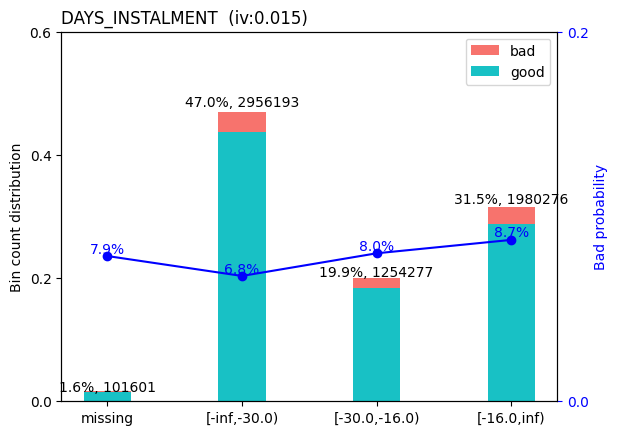

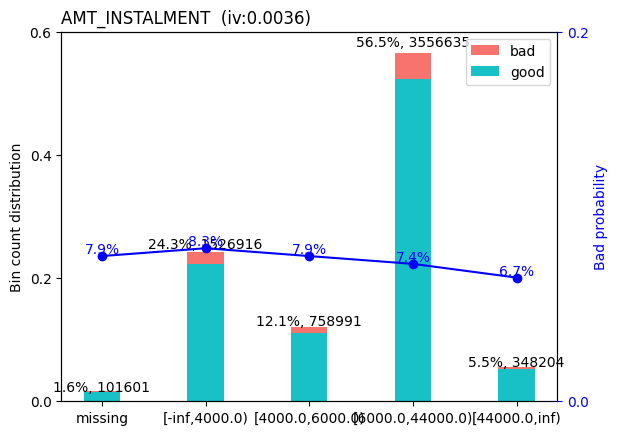

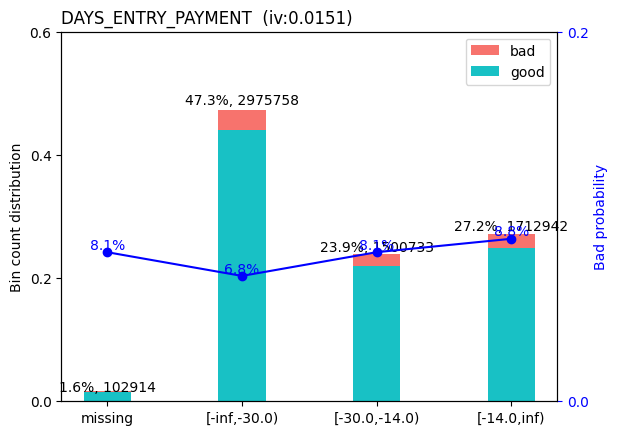

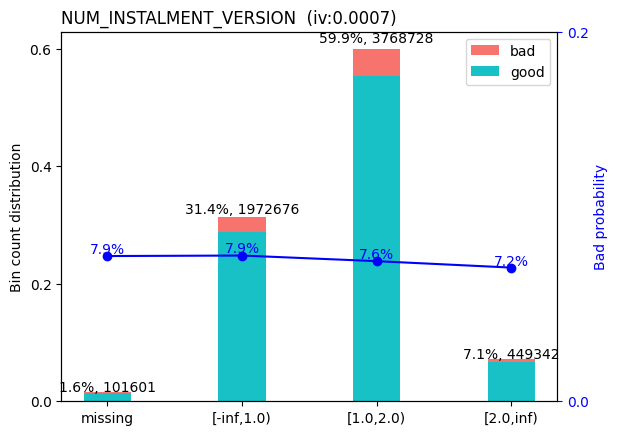

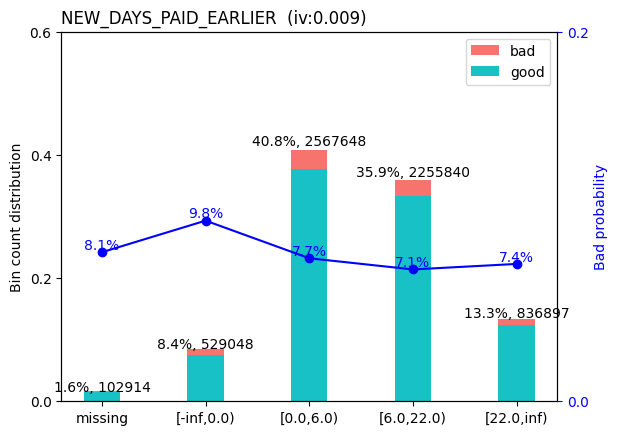

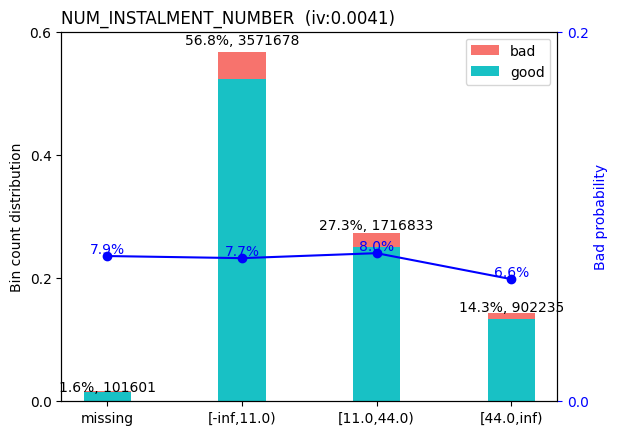

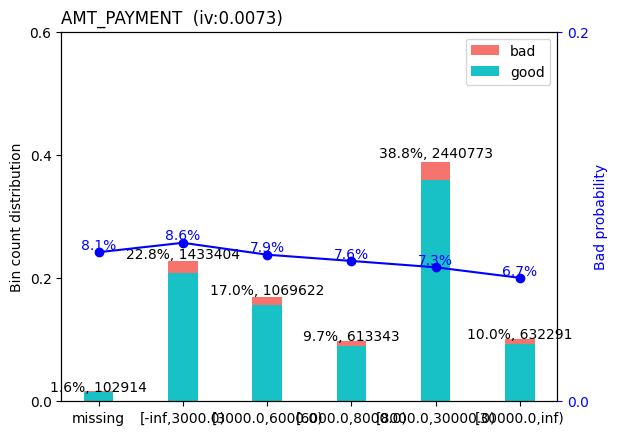

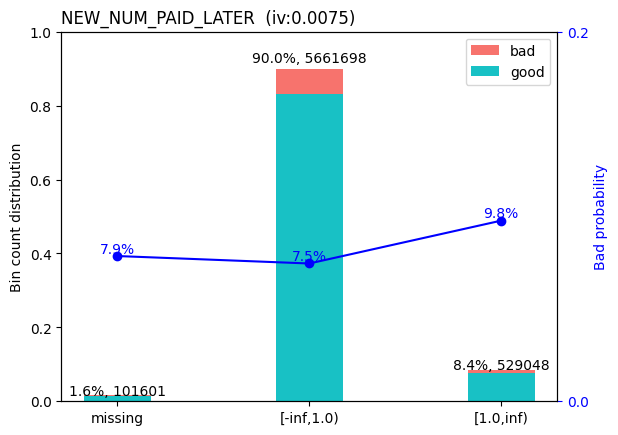

In [40]:
import scorecardpy as sc

bins = sc.woebin(df_install_merged.drop(columns = ["SK_ID_CURR","SK_ID_PREV"]), y="TARGET")
sc.woebin_plot(bins)


####AMT_PAYMENT
The higher CNT_INSTALLMENT is, the less likely to pay their current loan on time. 9.5% of the customers have Term of previous credit over 47 months is 1, compared to only 7% of the customers with Term of previous credit under 12 months
####CNT_INSTALLMENT_FUTURE
The higher CNT_INSTALLMENT_FUTURE is, the less likely to pay their current loan on time. 9.1% of the customers have Term of previous credit over 47 months is 1, compared to only 7.1% of the customers with Term of previous credit under 14 months

array([[<Axes: title={'center': 'DAYS_INSTALMENT'}>,
        <Axes: title={'center': 'DAYS_ENTRY_PAYMENT'}>]], dtype=object)

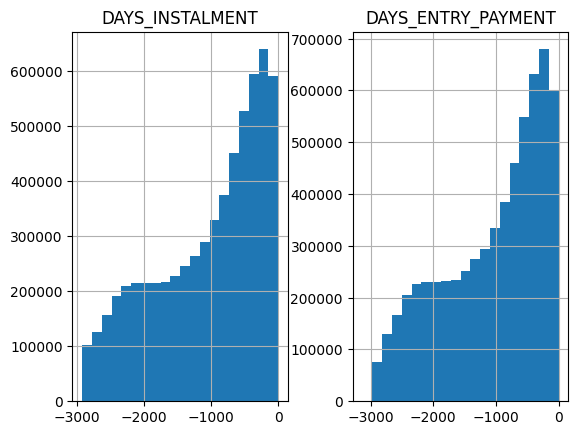

In [22]:
df_install_merged.iloc[:,5:7].hist(bins=20)


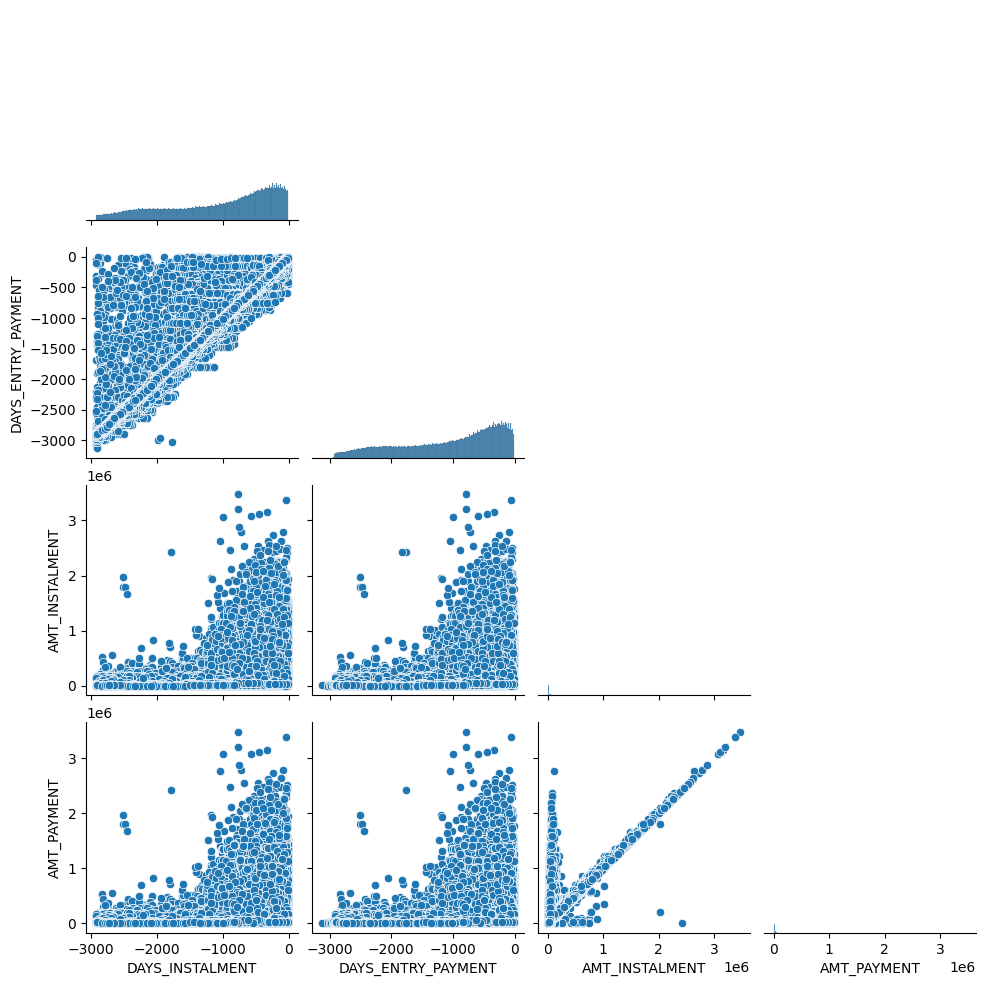

In [23]:
sns.pairplot(df_install_merged.iloc[:,5:9], corner=True)

In [24]:
df_install_merged[["SK_ID_CURR","DAYS_INSTALMENT","DAYS_ENTRY_PAYMENT"]]

,SK_ID_CURR,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT
0,278621,-686.0,-690.0
1,278621,-656.0,-661.0
2,278621,-2220.0,-2226.0
3,278621,-2070.0,-2071.0
4,278621,-2190.0,-2199.0
...,...,...,...
6292342,90253,NaN,NaN
6292343,9027,NaN,NaN
6292344,163598,NaN,NaN
6292345,300375,NaN,NaN


In [25]:
def convert_month(day_to_month):
    day_to_month_1 = day_to_month/30 
    return day_to_month_1
df_install_merged['DAYS_INSTALMENT'] =  df_install_merged['DAYS_INSTALMENT'].apply(convert_month)
df_install_merged['DAYS_ENTRY_PAYMENT'] = df_install_merged['DAYS_ENTRY_PAYMENT'].apply(convert_month)

In [26]:
df_install_merged 

,SK_ID_CURR,TARGET,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,NEW_DAYS_PAID_EARLIER,NEW_NUM_PAID_LATER
0,278621,0,1810518.0,1.0,2.0,-22.866667,-23.000000,98356.995,98356.995,4.0,0.0
1,278621,0,1810518.0,1.0,3.0,-21.866667,-22.033333,98356.995,98356.995,5.0,0.0
2,278621,0,2396755.0,1.0,4.0,-74.000000,-74.200000,6737.310,6737.310,6.0,0.0
3,278621,0,2396755.0,1.0,9.0,-69.000000,-69.033333,6737.310,6737.310,1.0,0.0
4,278621,0,2396755.0,1.0,5.0,-73.000000,-73.300000,6737.310,6737.310,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6292342,90253,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6292343,9027,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6292344,163598,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6292345,300375,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


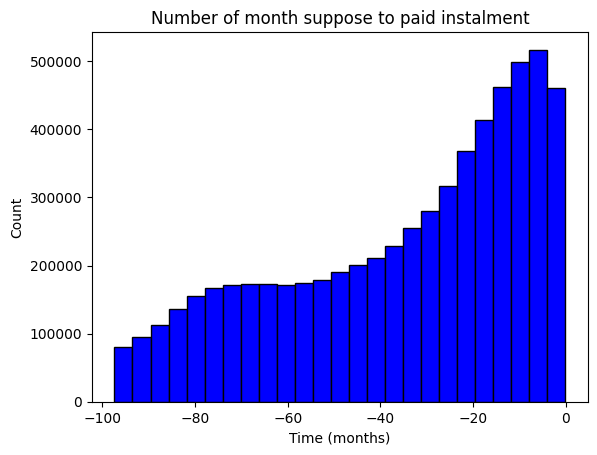

In [27]:
plt.hist(df_install_merged['DAYS_INSTALMENT'], color = 'blue', edgecolor = 'k', bins = 25)
plt.title('Number of month suppose to paid instalment'); plt.xlabel('Time (months)'); plt.ylabel('Count');

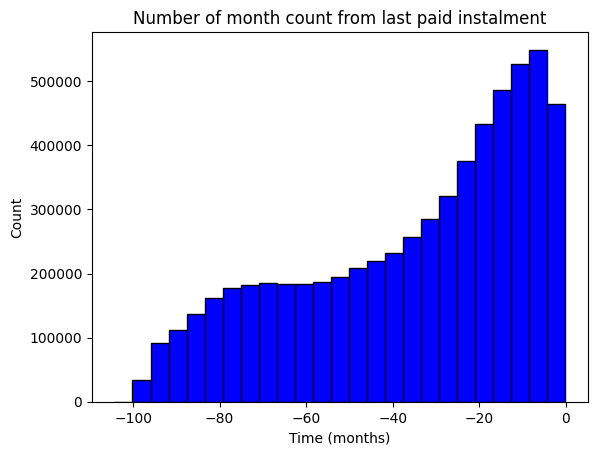

In [28]:
plt.hist(df_install_merged['DAYS_ENTRY_PAYMENT'], color = 'blue', edgecolor = 'k', bins = 25)
plt.title('Number of month count from last paid instalment'); plt.xlabel('Time (months)'); plt.ylabel('Count');

In [35]:
max_late = df_install_merged.groupby('SK_ID_CURR')[['NEW_NUM_PAID_LATER']].max()
max_late

,NEW_NUM_PAID_LATER
SK_ID_CURR,
0,0.0
1,1.0
2,NaN
3,0.0
4,0.0
...,...
307505,NaN
307506,1.0
307507,NaN
